# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [1]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.dates import DateFormatter
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline
# More plot styles
import seaborn as sns
# Clickable d3.js-Plots
import plotly.offline as po
import plotly.graph_objs as go 
import numpy as np

## Data import

In [2]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


In [3]:
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df['Time']), inplace = True)

#create a new culumn with only the 'Uhrzeit'
df['Time'] = pd.to_datetime(df['Time'])
df['Uhrzeit'] = df['Time'].dt.strftime('%H:%M:%S')

# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l,Uhrzeit
Time,,,,,,
2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,07:30:00
2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,07:32:00
2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,07:34:00
2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,07:36:00
2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,07:38:00


---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

# Fragestellung

Es soll der Datensatz zu einer Federspeicherbremse der Lokomotive ABC-123 untersucht werden, welche im Betrieb auf Grund von starken Schwankungen der Haltekraft F ausgefallen ist.

Hier wurde festgestellt, dass ein Unterschreiten der Mindesthaltekraft von 18 kN mit Fertigungsungenauigkeiten der Feder sowie des Kolbens zusammenhängt.

Es soll nun untersucht werden ob der gegebene Datensatz Informationen darüber enthält ob der Fehler systematisch auftritt und ob das Problem auf einzelne Maße reduziert werden kann.

Die dazu verfügbaren Daten bestehen aus Abweichungen zu Sollwerten von

**Dicke des Kolbens "d"**

**Lage der Bohrung des Hammerheads "h_1" & "h_2"**  

**Länge der Kolbenstange "l"**

# Analyse

In [4]:
df[df['F'] <= 18000]['F'].head(5) #sortieren der Ausschusswerte und testweises Anzeigen der ersten 5 Fehler

Time
2022-10-26 07:42:00    15969.394445
2022-10-26 08:38:00    17695.840912
2022-10-26 08:40:00    16968.687761
2022-10-26 08:42:00    17442.243443
2022-10-26 08:44:00    15682.401992
Name: F, dtype: float64

In [5]:
df[df['F'] >=0]['F'].count()

300

In [6]:
df[df['F'] <= 18000]['F'].count() # Zählfunktion der Werte unter 18 kN

42

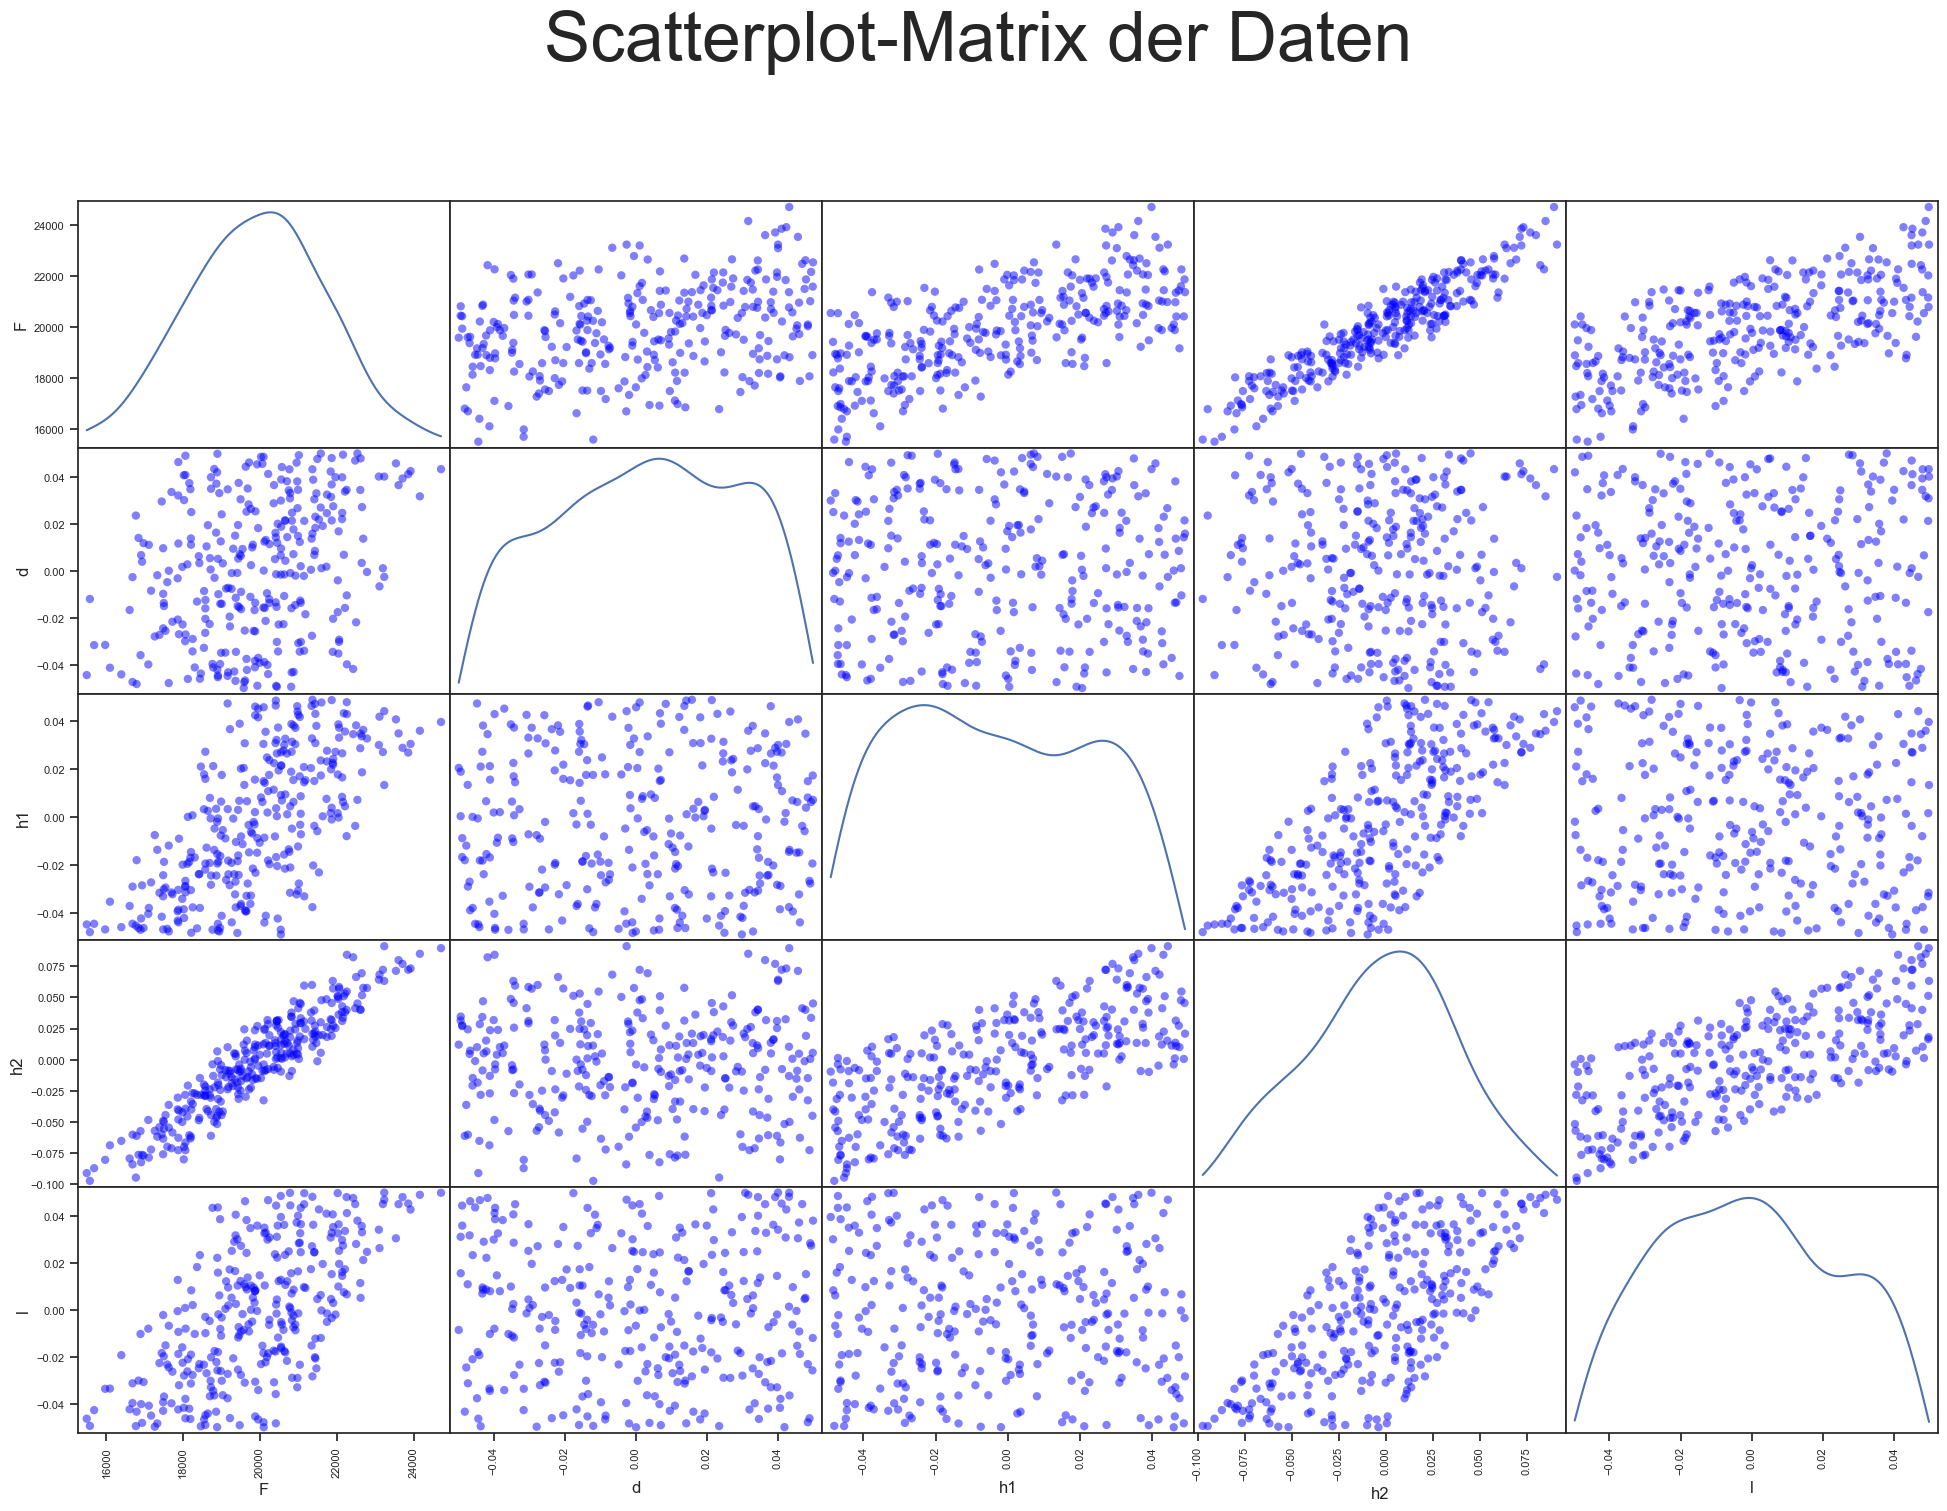

In [7]:
# Seaborn-Stil anwenden
sns.set(style="ticks")

# Scatterplot-Matrix erstellen
m = scatter_matrix(df, figsize=(24, 16), marker='o', diagonal='kde', c='blue')
plt.suptitle('Scatterplot-Matrix der Daten', y=1, size=50)
plt.show()

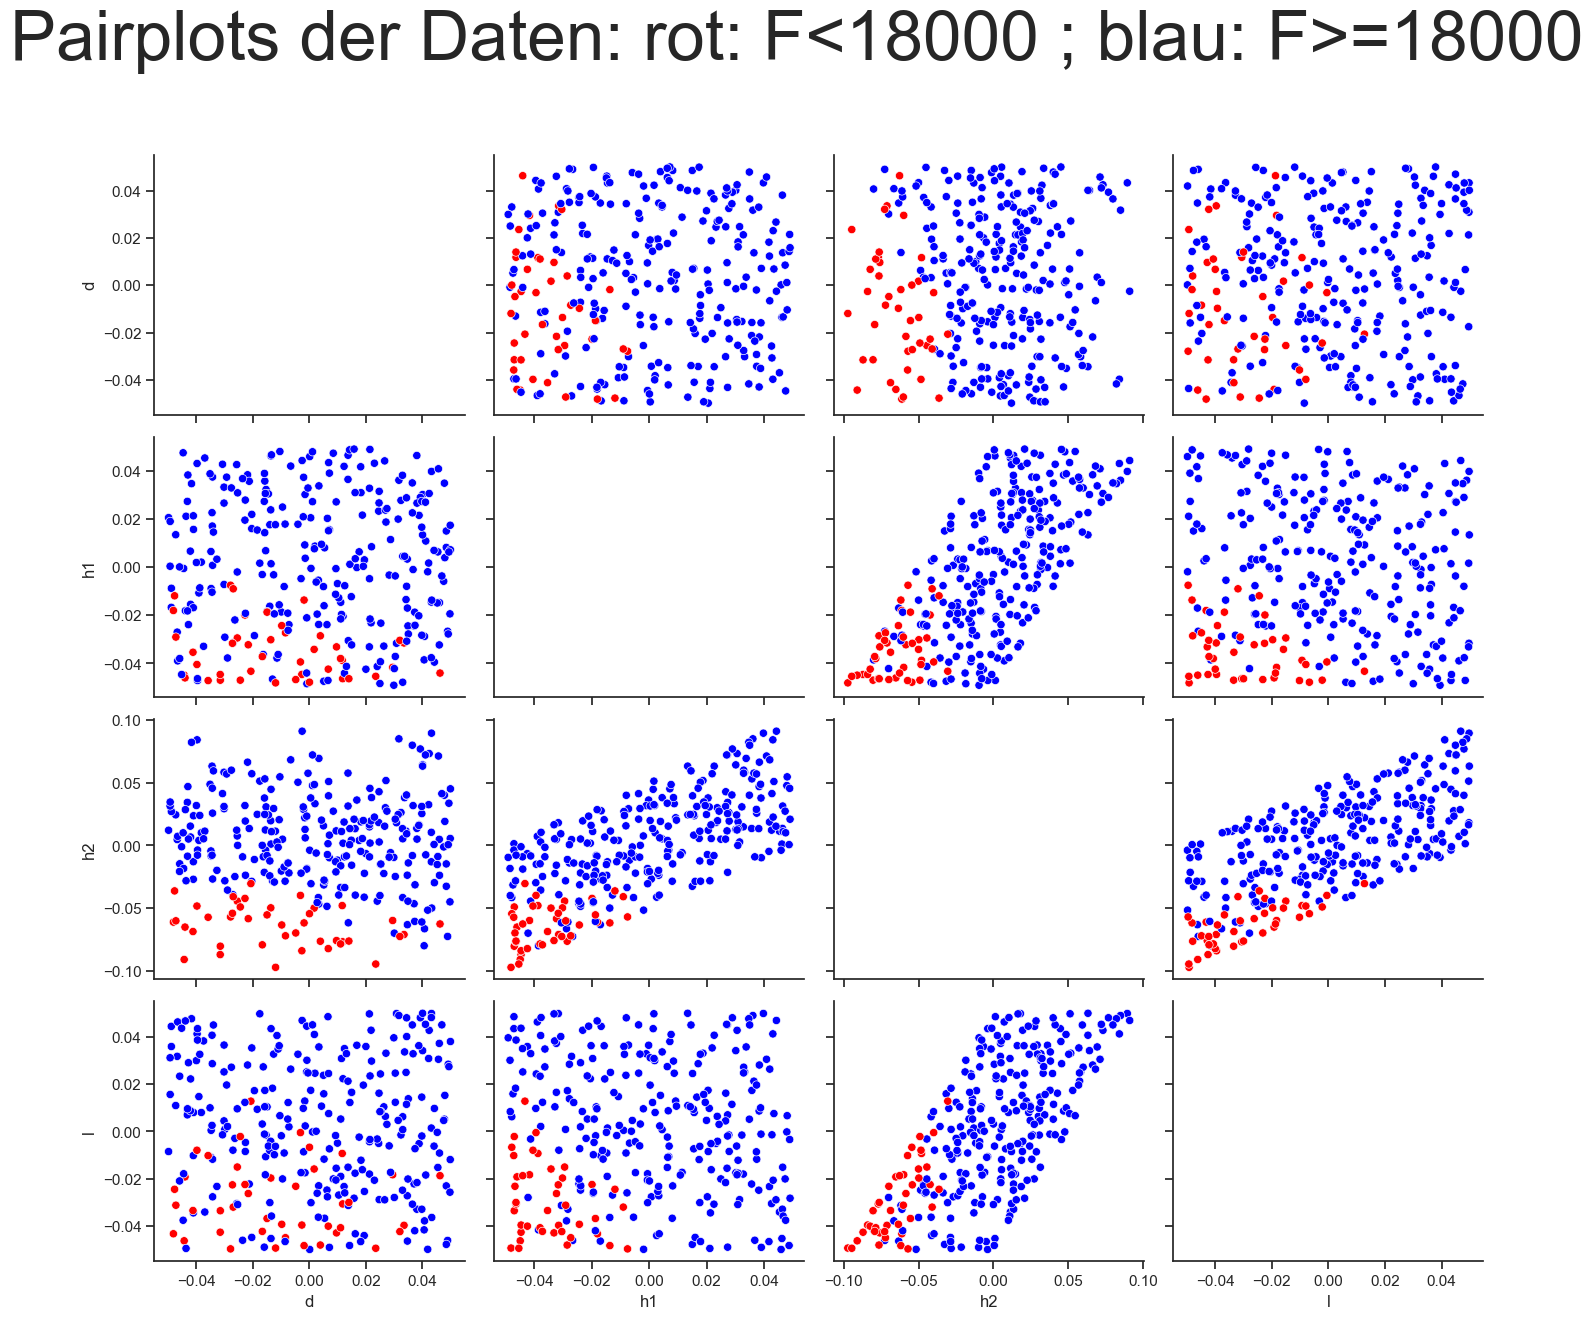

In [8]:
# Farbpalette in Abhängigkeit von F festlegen
palette = {value: 'blue' if value > 18000 else 'red' for value in df['F'].unique()}

# PairGrid erstellen
g = sns.PairGrid(df, hue='F', palette=palette, height=3, aspect=1.2)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
#g.add_legend()        # keine Legende, da jeder Wert einzeln dargestellt wird

# Diagramm anzeigen
plt.suptitle('Pairplots der Daten')
plt.suptitle('Pairplots der Daten: rot: F<18000 ; blau: F>=18000', y=1.1, size=50)
plt.show()

In [9]:
df.drop(index = df[df['F'] >= 18000].index, inplace=True)
df.head()

,F,d,h1,h2,l,Uhrzeit
Time,,,,,,
2022-10-26 07:42:00,15969.394445,-0.031502,-0.046969,-0.080410,-0.033441,07:42:00
2022-10-26 08:38:00,17695.840912,0.033534,-0.031506,-0.071098,-0.039592,08:38:00
2022-10-26 08:40:00,16968.687761,0.011802,-0.046347,-0.076916,-0.030570,08:40:00
2022-10-26 08:42:00,17442.243443,0.029513,-0.041646,-0.059912,-0.018266,08:42:00
2022-10-26 08:44:00,15682.401992,-0.031538,-0.044601,-0.087096,-0.042495,08:44:00


<Axes: xlabel='Time'>

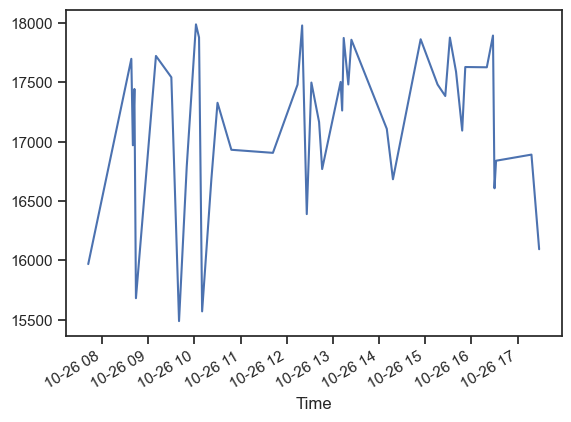

In [10]:
df['F'].plot()

C:\Users\LSchn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



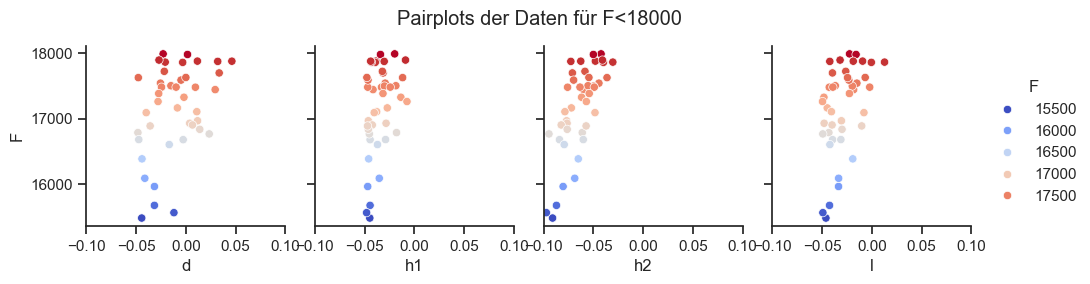

In [11]:
# Setze die x-Achsenlimits
xlim = (-0.1, 0.1)

# Erstelle das pairplot
g = sns.pairplot(df, hue='F', palette='coolwarm', x_vars=['d', 'h1','h2', 'l'], y_vars = 'F', 
                 diag_kind='kde', markers=None, height=2.5, aspect=1, corner=False,
                 dropna=False)

# Setze die x-Achsenlimits für alle Subplots
for ax in g.axes.flat:
    ax.set_xlim(xlim)

# Setze den Titel
plt.suptitle('Pairplots der Daten für F<18000', y=1.1)

# Zeige das Plot an
plt.show()

# Ergebnis